## Part A Cleaning and EDA

* Data cleaning
    * Are there missing values? 
        * No, I use .isnull().value_counts() to check it.
    * Are there inappropraite values? 
        * Yes, these columns have at least one 0 value
        * the Economy (GDP per Capita)
        * Family
        * Health (Life Expectancy)	
        * Freedom
        * Trust (Government Corruption)
        * Generosity
    * Remove or impute any bad data.
        * I write a piece of code to replace 0 value with the region's mean 

* Answer the following questions for the data in each column:
    * How is the data distributed? 
        * see the plots and data description
    * What are the summary statistics? 
        * Write below
    * Are there anomalies/outliers? 
        * According to the box-plot there are lots of outliers

* Plot each colmun as appropriate for the data type:
    * Write a summary of what the plot tells you. 
        * see the plot summary
    
* Are any of the columns correlated?
    * The happiness score has positive linear relationship with other parameters
    * Economy fmaily and health also have positive linear relationship with each other
    * Generosity, Dystopia Residual, Trust (Government Corruption) is not correlated with any other factors.

## Summary statistics
* The summary statistics show me the basic data statistic

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
import math
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 9)

In [2]:
whr = pd.read_csv('./world-happiness-report/whr.csv')
whr.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region Code
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,1
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,1
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,1
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016,1
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016,1


In [3]:
whr.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region Code
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.00000
mean,79.238095,5.378949,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032,2015.498413,6.08254
std,45.538922,1.141531,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728,0.500793,2.79094
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000,1.00000
25%,40.000000,4.510000,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135,2015.000000,4.00000
50%,79.000000,5.286000,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260,2015.000000,7.00000
75%,118.500000,6.269000,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,2016.000000,9.00000
max,158.000000,7.587000,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,2016.000000,10.00000


* check missing value

In [4]:
whr['Happiness Score'].isnull().value_counts()

False    315
Name: Happiness Score, dtype: int64

In [5]:
whr['Economy (GDP per Capita)'].isnull().value_counts()

False    315
Name: Economy (GDP per Capita), dtype: int64

In [6]:
whr['Family'].isnull().value_counts()

False    315
Name: Family, dtype: int64

In [7]:
whr['Freedom'].isnull().value_counts()

False    315
Name: Freedom, dtype: int64

In [8]:
whr['Trust (Government Corruption)'].isnull().value_counts()

False    315
Name: Trust (Government Corruption), dtype: int64

In [9]:
whr['Generosity'].isnull().value_counts()

False    315
Name: Generosity, dtype: int64

In [10]:
whr['Dystopia Residual'].isnull().value_counts()

False    315
Name: Dystopia Residual, dtype: int64

* replace 0 value with the region's mean 

In [11]:
pmean = whr.groupby(['Region'])['Economy (GDP per Capita)'].mean()
errors = whr[whr['Economy (GDP per Capita)'].isin([0.0])]
for x in errors.index:
    whr['Economy (GDP per Capita)'][x] = pmean[whr['Region'][x]]
pmean = whr.groupby(['Region'])['Family'].mean()
errors = whr[whr['Family'].isin([0.0])]
for x in errors.index:
    whr['Family'][x] = pmean[whr['Region'][x]]
pmean = whr.groupby(['Region'])['Freedom'].mean()
errors = whr[whr['Freedom'].isin([0.0])]
for x in errors.index:
    whr['Freedom'][x] = pmean[whr['Region'][x]]
pmean = whr.groupby(['Region'])['Generosity'].mean()
errors = whr[whr['Generosity'].isin([0.0])]
for x in errors.index:
    whr['Generosity'][x] = pmean[whr['Region'][x]]
pmean = whr.groupby(['Region'])['Trust (Government Corruption)'].mean()
errors = whr[whr['Trust (Government Corruption)'].isin([0.0])]
for x in errors.index:
    whr['Trust (Government Corruption)'][x] = pmean[whr['Region'][x]]
pmean = whr.groupby(['Region'])['Health (Life Expectancy)'].mean()
errors = whr[whr['Health (Life Expectancy)'].isin([0.0])]
for x in errors.index:
    whr['Health (Life Expectancy)'][x] = pmean[whr['Region'][x]]

In [12]:
whr.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Region Code
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.00000
mean,79.238095,5.378949,0.902543,0.897118,0.595716,0.402047,0.141285,0.241883,2.212032,2015.498413,6.08254
std,45.538922,1.141531,0.406207,0.278097,0.237557,0.147330,0.114982,0.128745,0.558728,0.500793,2.79094
min,1.000000,2.839000,0.015300,0.104190,0.038240,0.005890,0.002270,0.001990,0.328580,2015.000000,1.00000
25%,40.000000,4.510000,0.594900,0.739880,0.419645,0.303100,0.061890,0.155415,1.884135,2015.000000,4.00000
50%,79.000000,5.286000,0.973060,0.937930,0.640450,0.413190,0.106130,0.220400,2.211260,2015.000000,7.00000
75%,118.500000,6.269000,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470,2016.000000,9.00000
max,158.000000,7.587000,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720,2016.000000,10.00000


In [13]:
whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 13 columns):
Country                          315 non-null object
Region                           315 non-null object
Happiness Rank                   315 non-null int64
Happiness Score                  315 non-null float64
Economy (GDP per Capita)         315 non-null float64
Family                           315 non-null float64
Health (Life Expectancy)         315 non-null float64
Freedom                          315 non-null float64
Trust (Government Corruption)    315 non-null float64
Generosity                       315 non-null float64
Dystopia Residual                315 non-null float64
Year                             315 non-null int64
Region Code                      315 non-null int64
dtypes: float64(8), int64(3), object(2)
memory usage: 32.1+ KB


In [14]:
whr.shape

(315, 13)

In [15]:
whr.groupby(['Region']).describe()

Dystopia Residual                      \
                                            count      mean       std   
Region                                                                  
Australia and New Zealand                     4.0  2.388185  0.144764   
Central and Eastern Europe                   58.0  2.145811  0.466042   
Eastern Asia                                 12.0  1.791144  0.597087   
Latin America and Caribbean                  46.0  2.744404  0.492645   
Middle East and Northern Africa              39.0  2.124539  0.578664   
North America                                 4.0  2.598635  0.138298   
Southeastern Asia                            18.0  1.893965  0.400703   
Southern Asia                                14.0  2.093435  0.706105   
Sub-Saharan Africa                           78.0  2.091293  0.547802   
Western Europe                               42.0  2.268381  0.379721   

                                                                        \
                                     min       25%       50%       75%   
Region                                                                   
Australia and New Zealand        2.26425  2.265907  2.370995  2.493272   
Central and Eastern Europe       0.89991  1.869958  2.204470  2.432632   
Eastern Asia                     0.65429  1.488793  1.833120  2.245643   
Latin America and Caribbean      1.21305  2.360405  2.823810  3.077422   
Middle East and Northern Africa  0.32858  1.878150  2.090660  2.417865   
North America                    2.45176  2.495522  2.607480  2.710592   
Southeastern Asia                0.98195  1.741893  1.913605  2.172890   
Southern Asia                    0.67108  1.859895  2.162950  2.469987   
Sub-Saharan Africa               0.67042  1.787395  2.105425  2.447245   
Western Europe                   1.26462  1.999035  2.360185  2.543805   

                                         Economy (GDP per Capita)            \
                                     max                    count      mean   
Region                                                                        
Australia and New Zealand        2.54650                      4.0  1.347212   
Central and Eastern Europe       3.38007                     58.0  0.994988   
Eastern Asia                     2.61523                     12.0  1.214546   
Latin America and Caribbean      3.60214                     46.0  0.937647   
Middle East and Northern Africa  3.40904                     39.0  1.102221   
North America                    2.72782                      4.0  1.417228   
Southeastern Asia                2.57960                     18.0  0.842718   
Southern Asia                    3.18286                     14.0  0.610579   
Sub-Saharan Africa               3.83772                     78.0  0.437122   
Western Europe                   2.83137                     42.0  1.357826   

                                  ...   Trust (Government Corruption)  \
                                  ...                             75%   
Region                            ...                                   
Australia and New Zealand         ...                        0.421585   
Central and Eastern Europe        ...                        0.133120   
Eastern Asia                      ...                        0.182913   
Latin America and Caribbean       ...                        0.142170   
Middle East and Northern Africa   ...                        0.246390   
North America                     ...                        0.317360   
Southeastern Asia                 ...                        0.199408   
Southern Asia                     ...                        0.125795   
Sub-Saharan Africa                ...                        0.129692   
Western Europe                    ...                        0.356642   

                                          Year                                 \
                                     max count         mean 

## Box-Plot
* The plot show the difference Region's happiness score between 2015 and 2016. Also provide basic statistics for the data. And show the underlying outliers(4 individual points) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

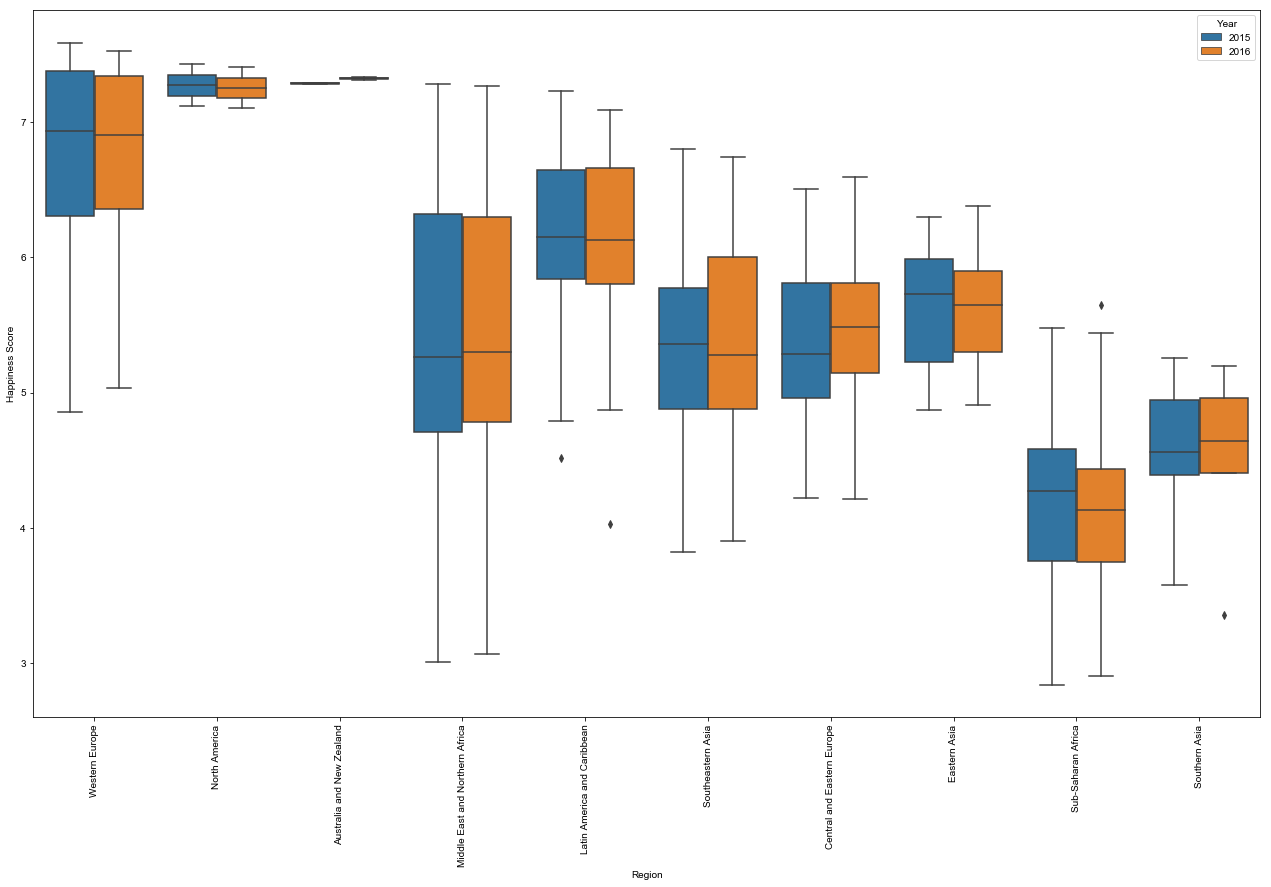

In [16]:
plt.rcParams['figure.figsize'] = (22, 13)
sns.boxplot(x="Region", y="Happiness Score", hue="Year", data=whr)
sns.set(font_scale=2)
plt.xticks(rotation=90)

## Histograms
* Density estimate with every column's data distribution

In [17]:
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 5)

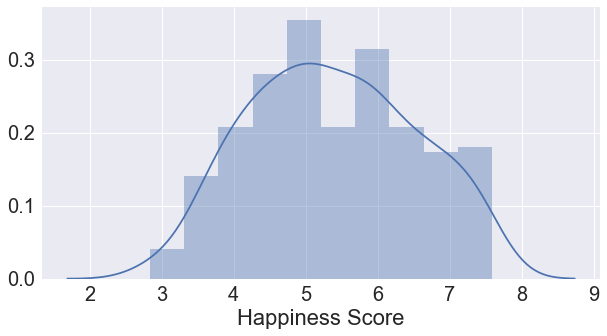

In [18]:
sns.distplot(whr['Happiness Score'])

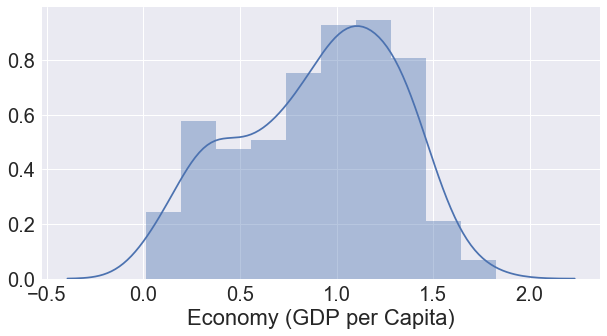

In [19]:
sns.distplot(whr['Economy (GDP per Capita)'])

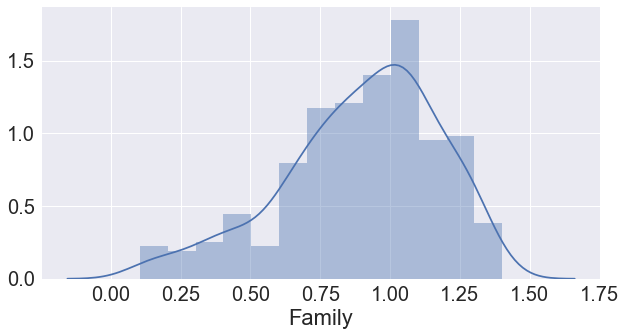

In [20]:
sns.distplot(whr['Family'])

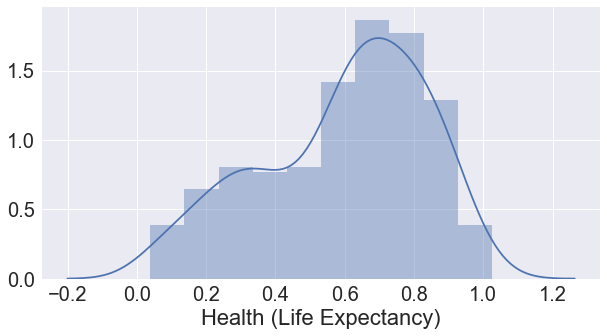

In [21]:
sns.distplot(whr['Health (Life Expectancy)'])

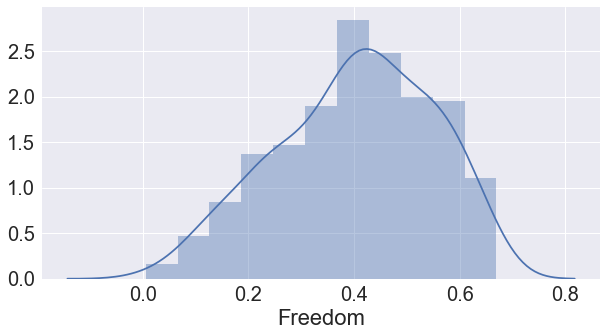

In [22]:
sns.distplot(whr['Freedom'])

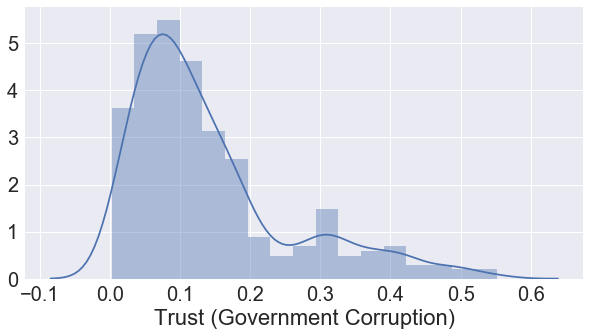

In [23]:
sns.distplot(whr['Trust (Government Corruption)'])

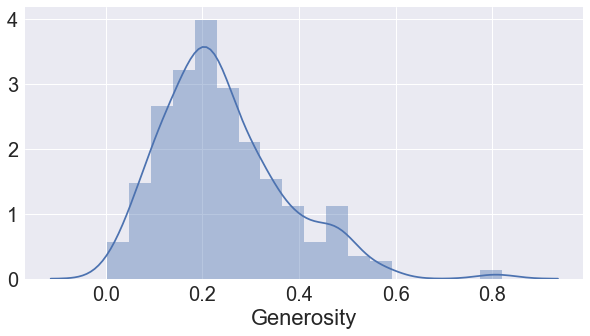

In [24]:
sns.distplot(whr['Generosity'])

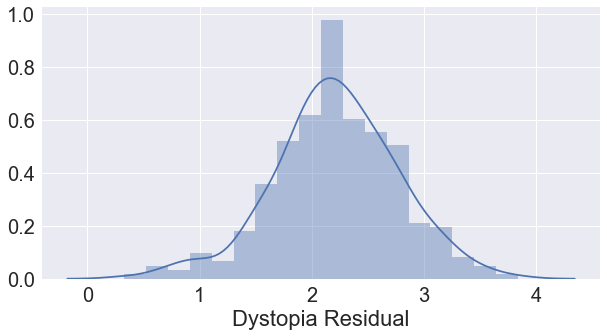

In [25]:
sns.distplot(whr['Dystopia Residual'])

## Strip plot
* show the Region's happiness score distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

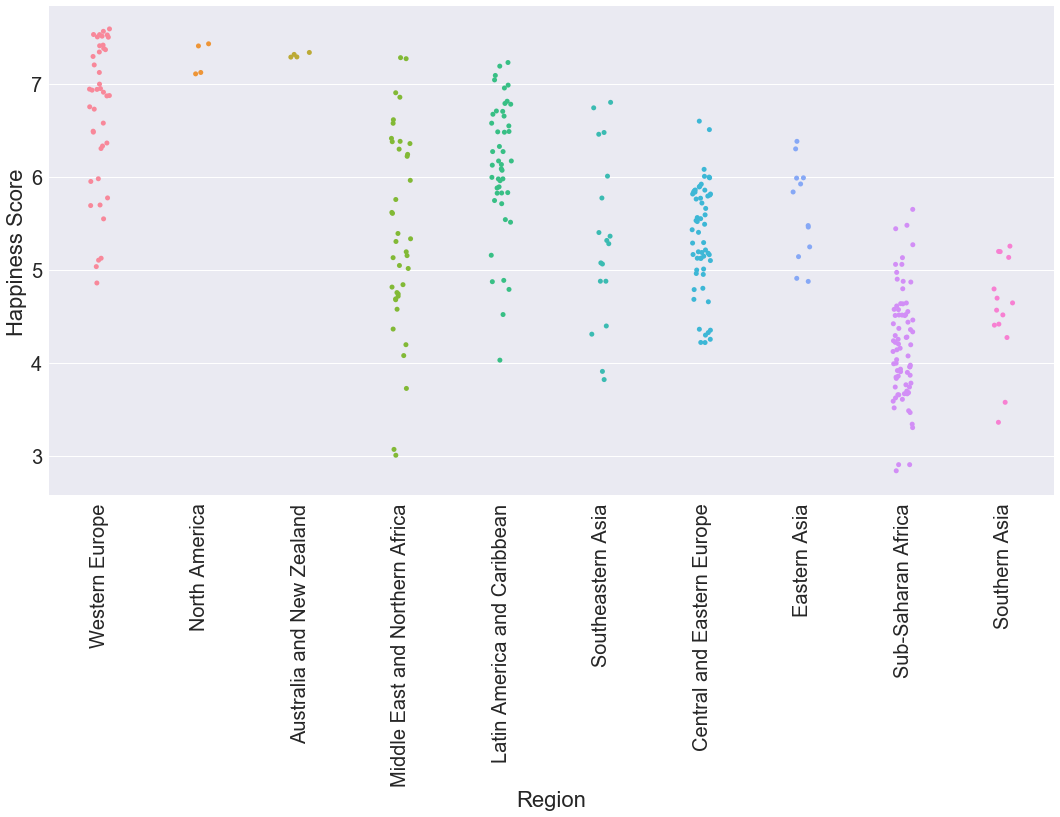

In [156]:
sns.stripplot(x="Region", y="Happiness Score", data=whr, jitter=True)
sns.set(font_scale=3)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

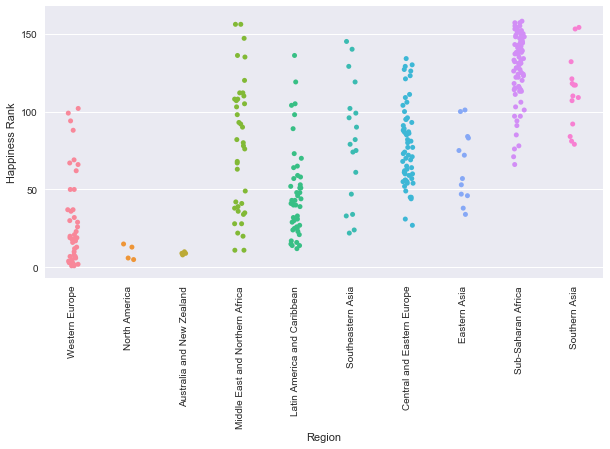

In [27]:
sns.stripplot(x="Region", y="Happiness Rank", data=whr, jitter=True)
sns.set(font_scale=2)
plt.xticks(rotation=90)

## Swarm plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

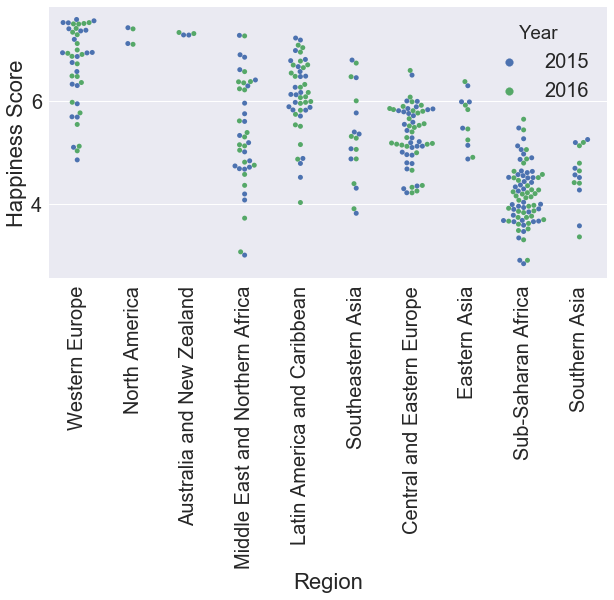

In [28]:
sns.swarmplot(x="Region", y="Happiness Score", hue="Year", data=whr)
sns.set(font_scale=3)
plt.xticks(rotation=90)

## Violin plots
* show both Region's happiness score distribution and density

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

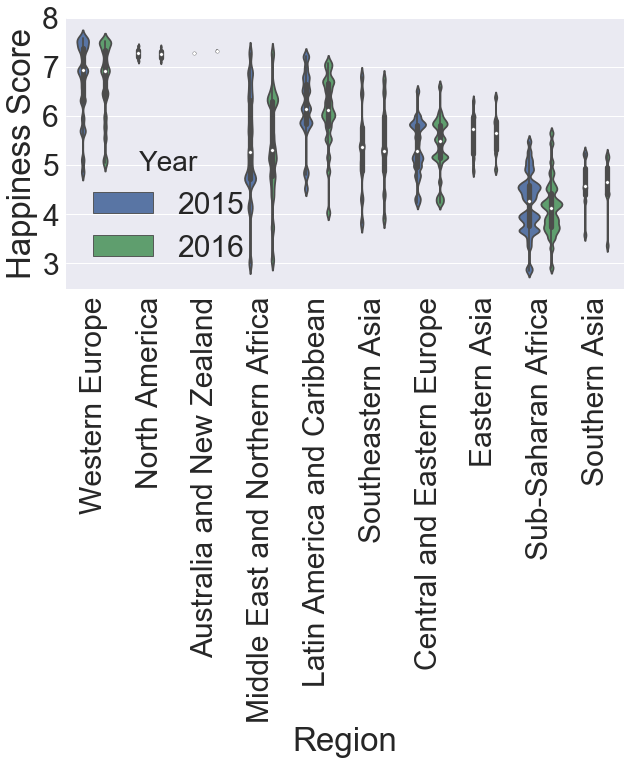

In [29]:
sns.violinplot(x="Region", y="Happiness Score", hue="Year", data=whr,bw=.1, scale="count", scale_hue=False)
sns.set(font_scale=1)
plt.xticks(rotation=90)

## Line charts
* show the relationship between columns and happiness score

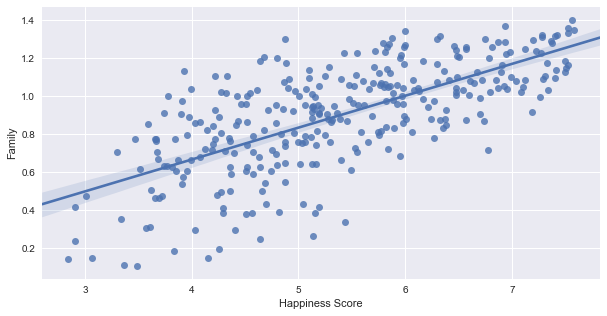

In [30]:
sns.regplot(x="Happiness Score", y="Family", data=whr)

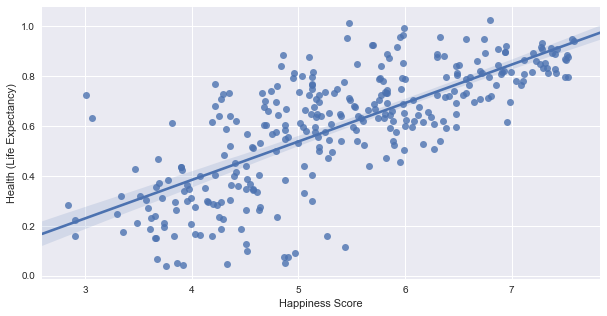

In [31]:
sns.regplot(x="Happiness Score", y="Health (Life Expectancy)", data=whr)

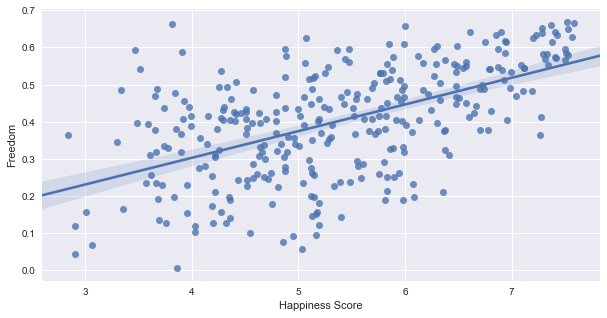

In [32]:
sns.regplot(x="Happiness Score", y="Freedom", data=whr)

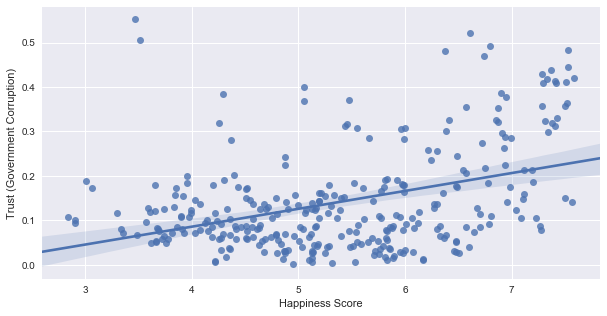

In [33]:
sns.regplot(x="Happiness Score", y="Trust (Government Corruption)", data=whr)

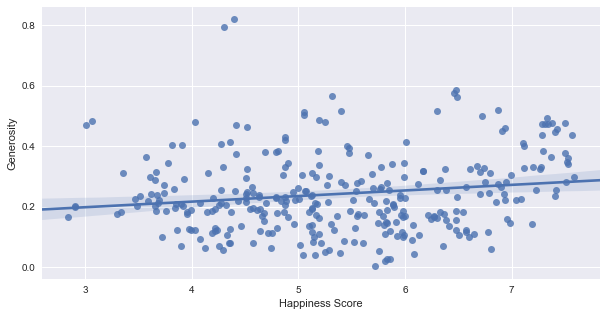

In [34]:
sns.regplot(x="Happiness Score", y="Generosity", data=whr)

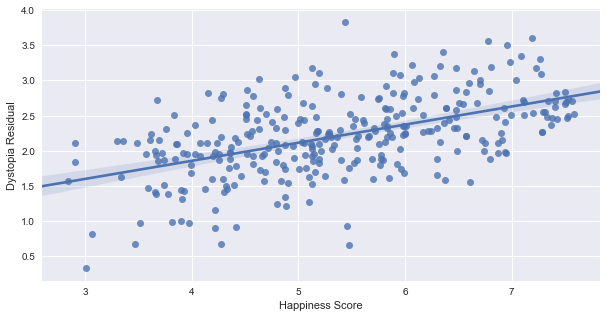

In [35]:
sns.regplot(x="Happiness Score", y="Dystopia Residual", data=whr)

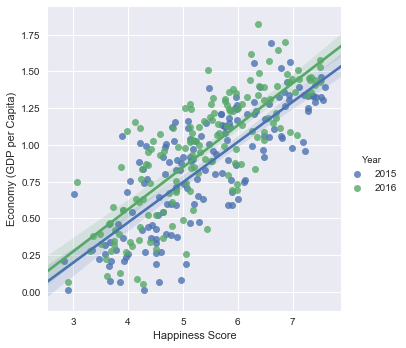

In [36]:
sns.lmplot(x="Happiness Score", y="Economy (GDP per Capita)", hue="Year", data=whr)

## Pairwise scatterplots
* The happiness score has positive linear relationship with other parameters
* Economy fmaily and health also have positive linear relationship with each other

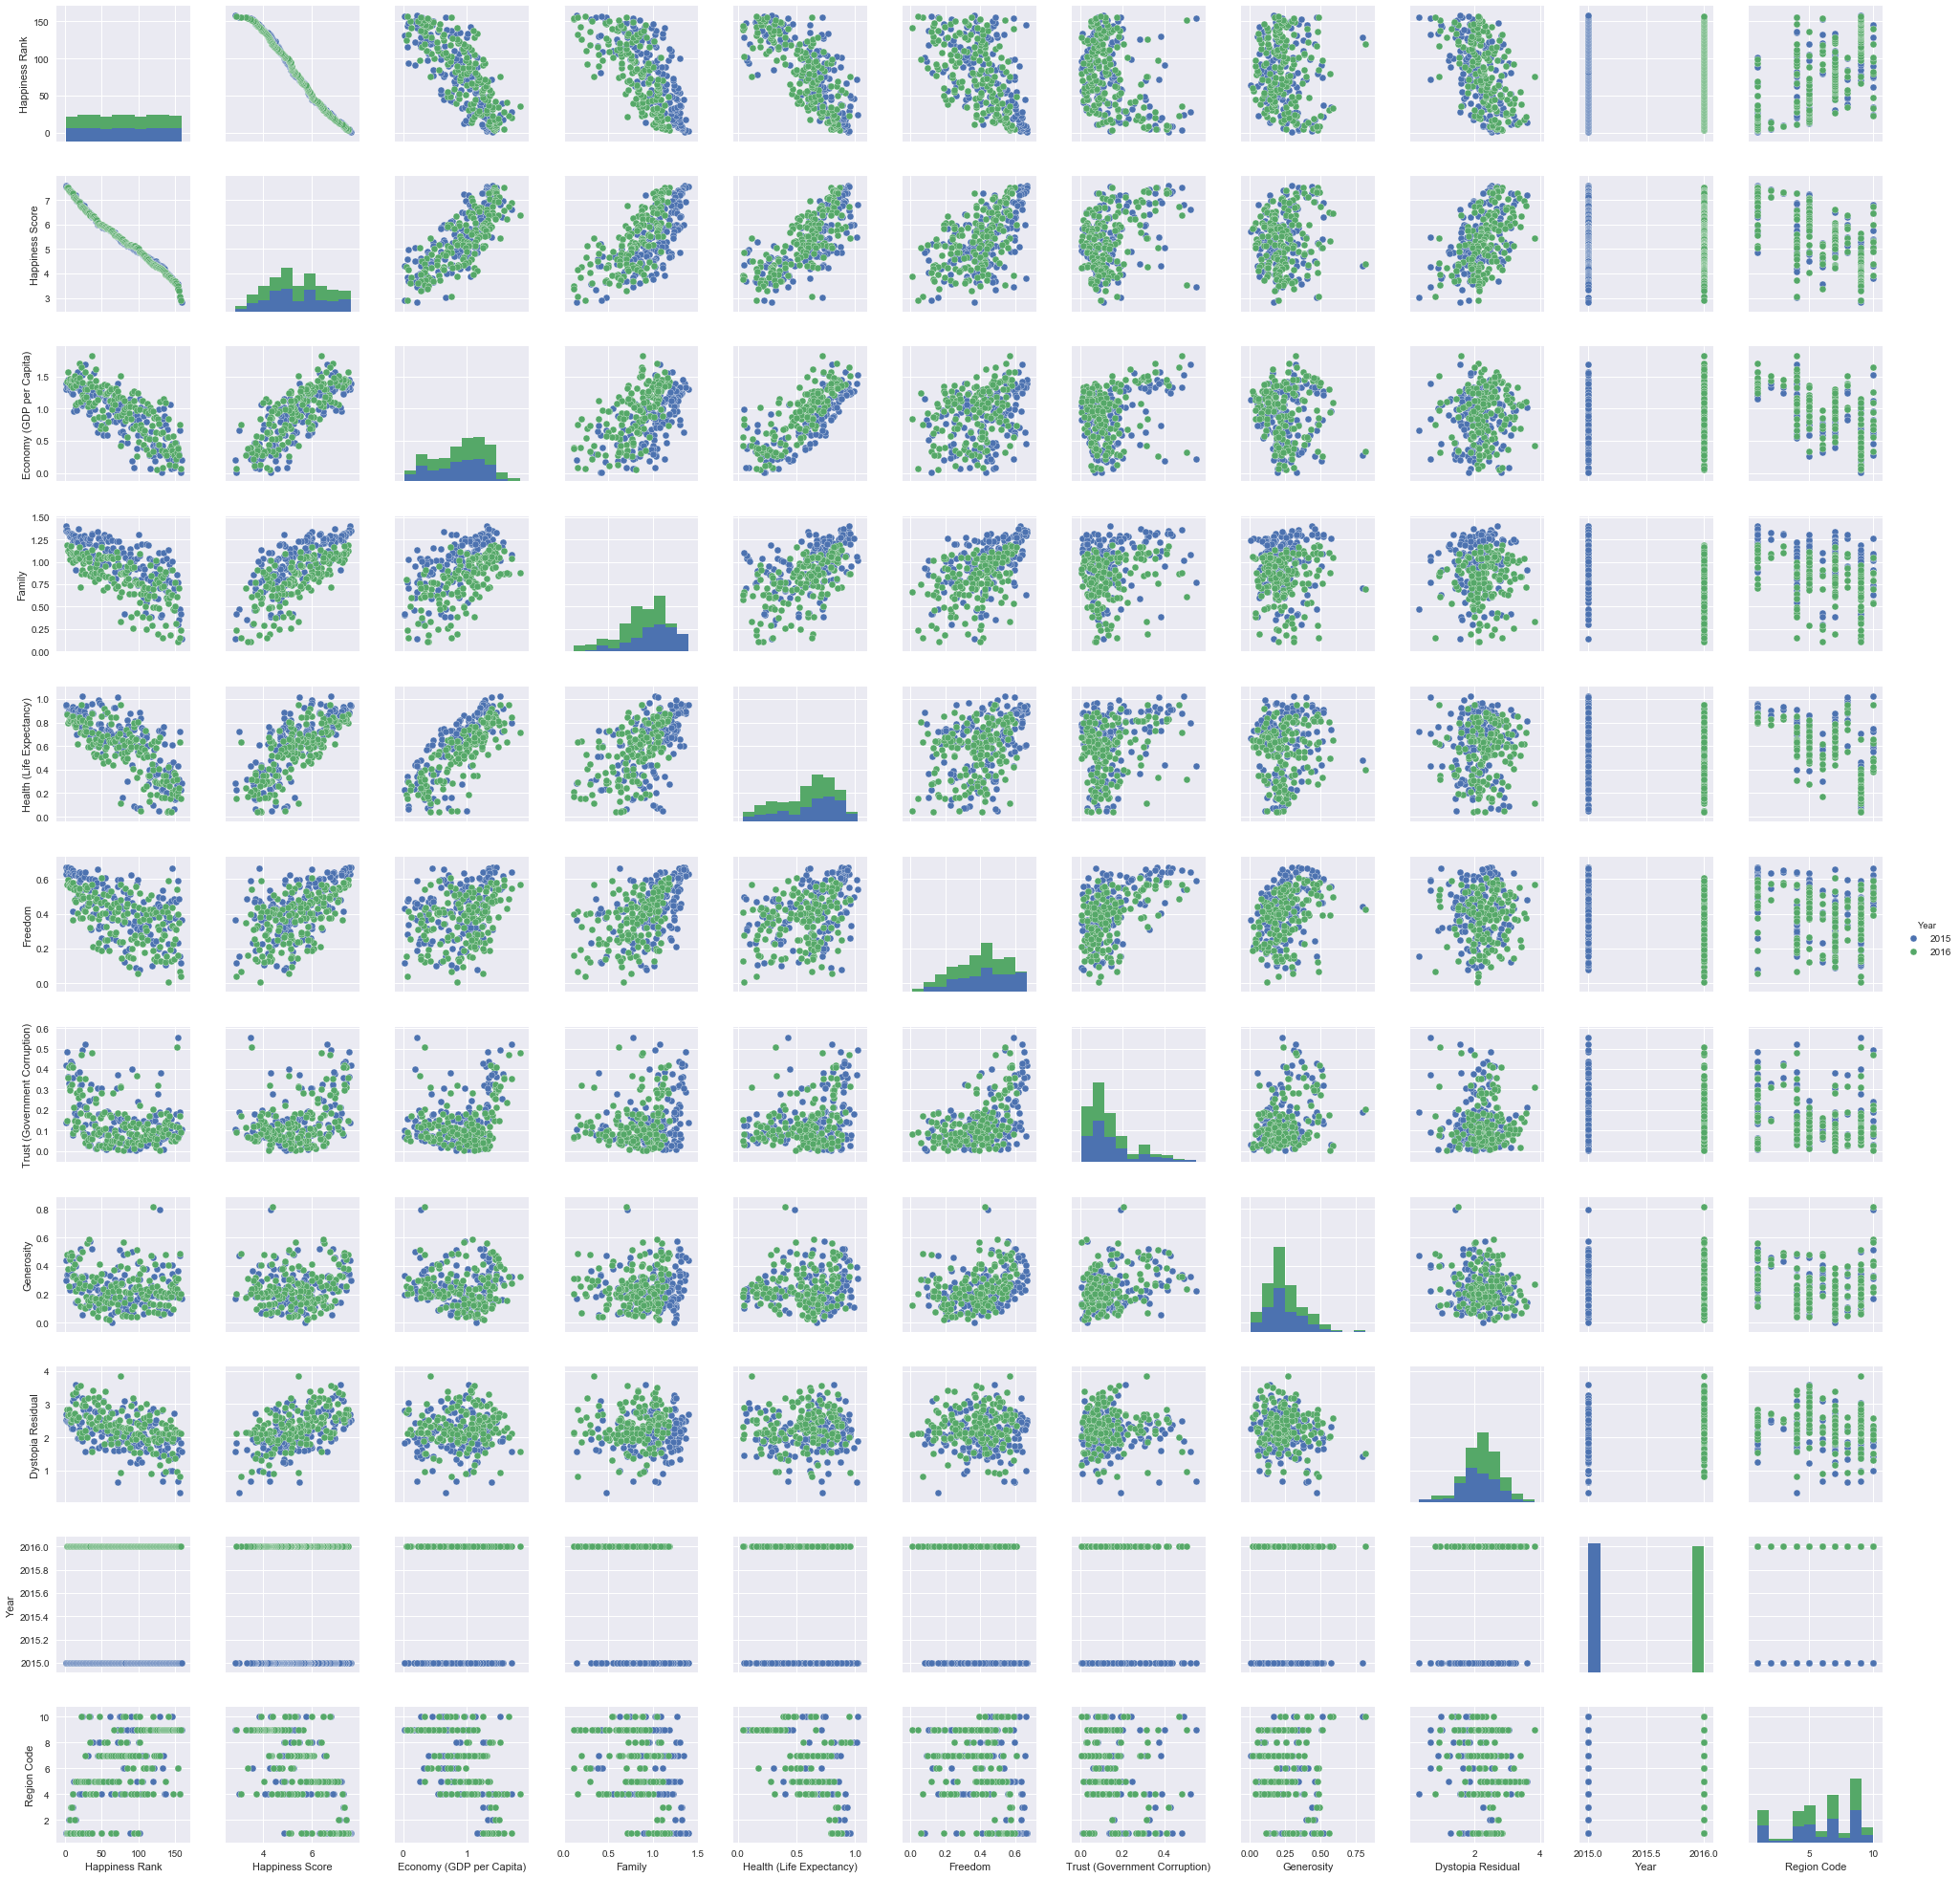

In [37]:
whrsub = whr[2:]
sns.pairplot(whrsub, hue="Year")

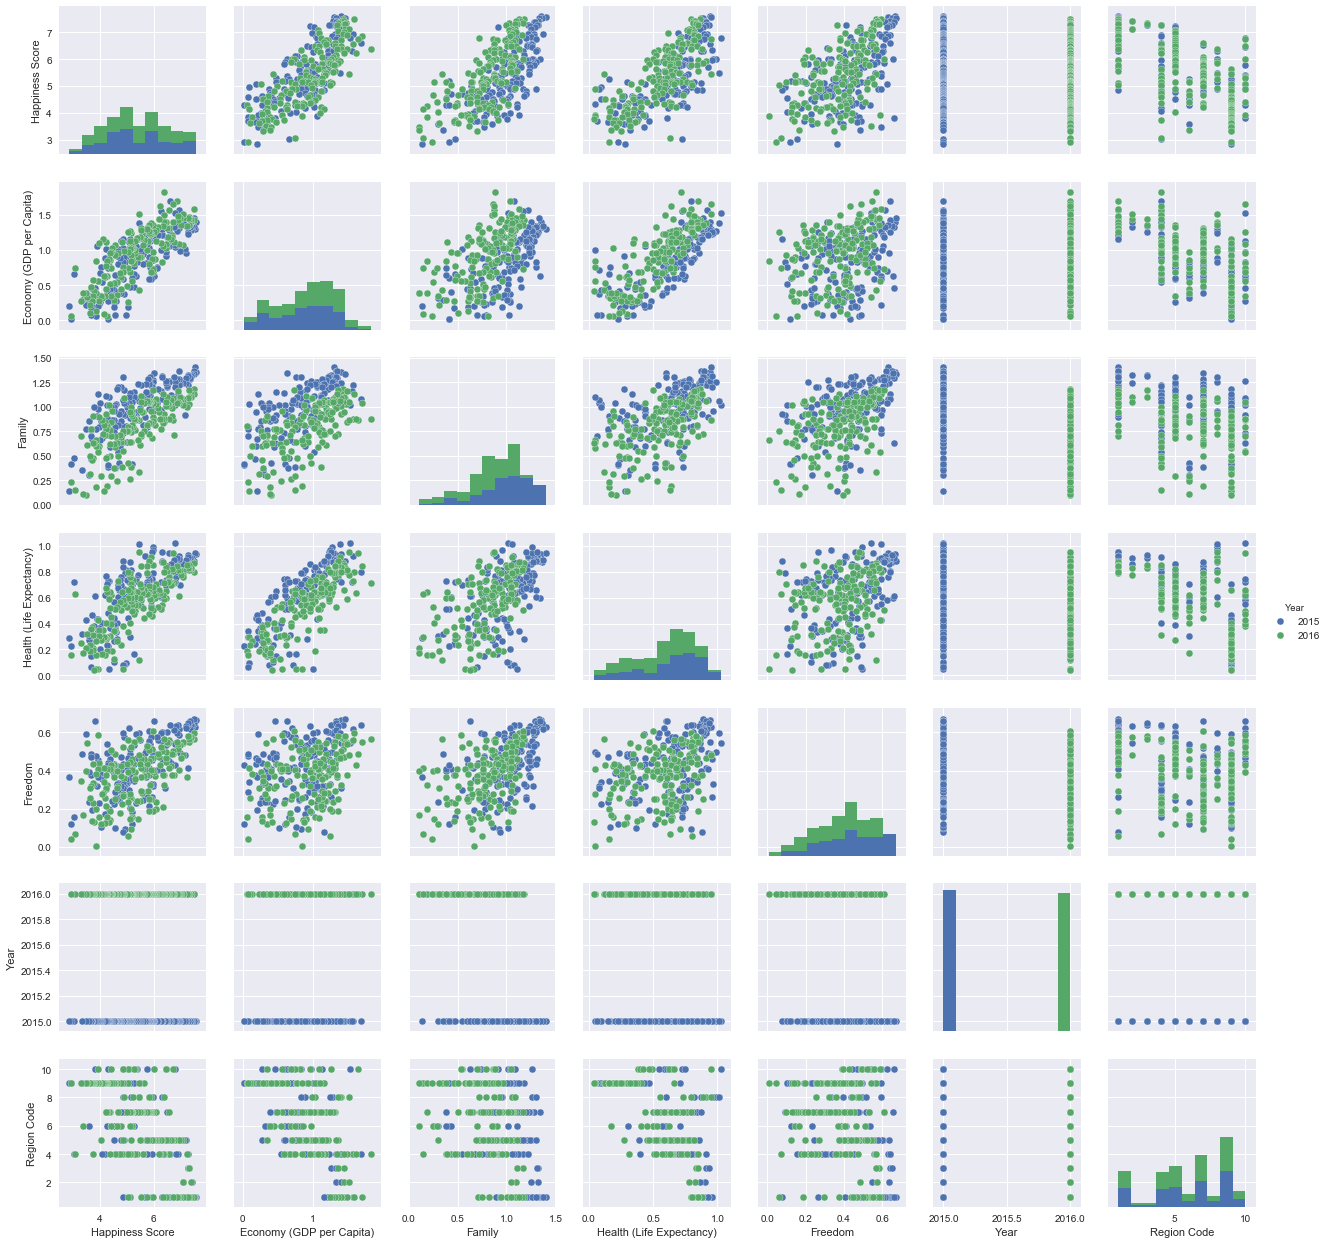

In [38]:
whrsub = whr[2:]
whrsub.drop(['Country', 'Region','Happiness Rank','Trust (Government Corruption)','Generosity','Dystopia Residual'], axis = 1, inplace = True)
sns.pairplot(whrsub, hue="Year")

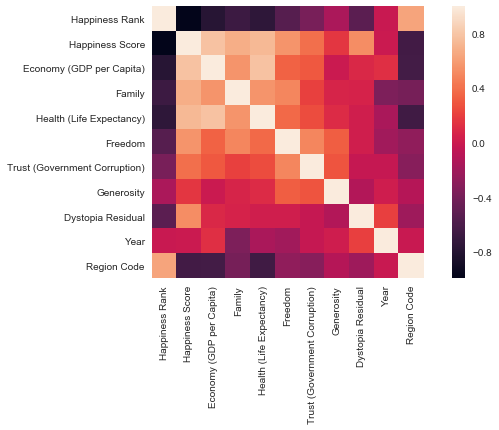

In [39]:
corrmat = whr.corr()
sns.heatmap(corrmat, vmax=1, square=True)

* Neuralnetworks with backpropagation to predict the country's region

* define util function

In [133]:
def rand(a, b):
    return (b - a) * random.random() + a

def make_matrix(m, n, fill=0.0):
    mat = []
    for i in range(m):
        mat.append([fill] * n)
    return mat

def sigmoid(x):
    return 1.0 / (1.0 + math.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def result_list(result):
    #resultlist = []
    max_item = max(result)
    i = 0
    m = 0
    for item in result:
        i += 1
        if item == max_item:
            m = i
    #resultlist.append(m)
    return m

* Neural network with BP algorithms

In [173]:
class BPNeuralNetwork:
    def __init__(self):
        self.input_n = 0
        self.hidden_n = 0
        self.output_n = 0
        self.input_cells = []
        self.hidden_cells = []
        self.output_cells = []
        self.input_weights = []
        self.output_weights = []
        self.input_correction = []
        self.output_correction = []
        self.region = []

    def setup(self, ni, nh, no):
        self.input_n = ni + 1
        self.hidden_n = nh
        self.output_n = no
        self.region = ['region','Western Europe','North America','Australia and New Zealand','Middle East and Northern Africa','Latin America and Caribbean',
                      'Southern Asia','Central and Eastern Europe','Eastern Asia','Sub-Saharan Africa','Southeastern Asia']
        # init cells
        self.input_cells = [1.0] * self.input_n
        self.hidden_cells = [1.0] * self.hidden_n
        self.output_cells = [1.0] * self.output_n
        # init weights
        self.input_weights = make_matrix(self.input_n, self.hidden_n)
        self.output_weights = make_matrix(self.hidden_n, self.output_n)
        # random activate
        for i in range(self.input_n):
            for h in range(self.hidden_n):
                self.input_weights[i][h] = rand(-0.2, 0.2)
        for h in range(self.hidden_n):
            for o in range(self.output_n):
                self.output_weights[h][o] = rand(-2.0, 2.0)
        # init correction matrix
        self.input_correction = make_matrix(self.input_n, self.hidden_n)
        self.output_correction = make_matrix(self.hidden_n, self.output_n)

    def predict(self, inputs):
        # activate input layer
        for i in range(self.input_n - 1):
            self.input_cells[i] = inputs[i]
        # activate hidden layer
        for j in range(self.hidden_n):
            total = 0.0
            for i in range(self.input_n):
                total += self.input_cells[i] * self.input_weights[i][j]
            self.hidden_cells[j] = sigmoid(total)
        # activate output layer
        for k in range(self.output_n):
            total = 0.0
            for j in range(self.hidden_n):
                total += self.hidden_cells[j] * self.output_weights[j][k]
            self.output_cells[k] = sigmoid(total)
        return self.output_cells[:]

    def back_propagate(self, case, label, learn, correct):
        # feed forward
        self.predict(case)
        # get output layer error
        output_deltas = [0.0] * self.output_n
        for o in range(self.output_n):
            error = label[o] - self.output_cells[o]
            output_deltas[o] = sigmoid_derivative(self.output_cells[o]) * error
        # get hidden layer error
        hidden_deltas = [0.0] * self.hidden_n
        for h in range(self.hidden_n):
            error = 0.0
            for o in range(self.output_n):
                error += output_deltas[o] * self.output_weights[h][o]
            hidden_deltas[h] = sigmoid_derivative(self.hidden_cells[h]) * error
        # update output weights
        for h in range(self.hidden_n):
            for o in range(self.output_n):
                change = output_deltas[o] * self.hidden_cells[h]
                self.output_weights[h][o] += learn * change + correct * self.output_correction[h][o]
                self.output_correction[h][o] = change
        # update input weights
        for i in range(self.input_n):
            for h in range(self.hidden_n):
                change = hidden_deltas[h] * self.input_cells[i]
                self.input_weights[i][h] += learn * change + correct * self.input_correction[i][h]
                self.input_correction[i][h] = change
        # get global error
        error = 0.0
        for o in range(len(label)):
            error += 0.5 * (label[o] - self.output_cells[o]) ** 2
        return error

    def train(self, cases, labels, limit=10000, learn=0.05, correct=0.01):
        for j in range(limit):
            error = 0.0
            for i in range(len(cases)):
                label = labels[i]
                case = cases[i]
                error += self.back_propagate(case, label, learn, correct)

    def test(self, traindata, result, testcases,testresult, ni, nh, no):
        self.setup(ni, nh, no)
        self.train(traindata, result, 2000, 0.05, 0.005)
        testout = []
        count = 0.0
        error = 0.0
        for case in testcases:
            #print(result_list(self.predict(case)))
            #print(self.predict(case))
            testout.append(result_list(self.predict(case)))
        for index in range(len(testout)):
            count += 1
            print("Predict: "+ self.region[testout[index]]+"    In dataset: "+ self.region[testresult[index]])
            if testout[index] != testresult[index]:
                error +=1
        accuracy = (count - error)/count
        print("Number of test: "+ str(count))
        print("Number of error: " + str(error))
        print("Accuracy: " + str(accuracy))
        return accuracy

* encode the 10 results and generate traindata(2015+2016 data) and testdata(2017 data)

In [158]:
whrcp = whr
traininput = whrcp.loc[:, 'Economy (GDP per Capita)':'Trust (Government Corruption)'].values
trainresult = whrcp.loc[:, 'Region Code'].values
resultx = []
for res in trainresult:
    restmp = []
    if res == 1:
        restmp = [1,0,0,0,0,0,0,0,0,0]
    elif res == 2:
        restmp = [0,1,0,0,0,0,0,0,0,0]
    elif res == 3:
        restmp = [0,0,1,0,0,0,0,0,0,0]
    elif res == 4:
        restmp = [0,0,0,1,0,0,0,0,0,0]
    elif res == 5:
        restmp = [0,0,0,0,1,0,0,0,0,0]
    elif res == 6:
        restmp = [0,0,0,0,0,1,0,0,0,0]
    elif res == 7:
        restmp = [0,0,0,0,0,0,1,0,0,0]
    elif res == 8:
        restmp = [0,0,0,0,0,0,0,1,0,0]
    elif res == 9:
        restmp = [0,0,0,0,0,0,0,0,1,0]
    elif res == 10:
        restmp = [0,0,0,0,0,0,0,0,0,1]
    resultx.append(restmp)
whr2017 = pd.read_csv('./world-happiness-report/2017.csv')
testinput = whr2017.loc[:, 'Economy..GDP.per.Capita.':'Trust..Government.Corruption.'].values
testresult = whr2017.loc[:, 'Region Code'].values

* Start predict

In [174]:
net = BPNeuralNetwork()
output = net.test(traininput,resultx,testinput,testresult,5,12,10)

Predict: Western Europe    In dataset: Western Europe
Predict: Western Europe    In dataset: Western Europe
Predict: Central and Eastern Europe    In dataset: Western Europe
Predict: Western Europe    In dataset: Western Europe
Predict: Western Europe    In dataset: Western Europe
Predict: Western Europe    In dataset: Western Europe
Predict: Western Europe    In dataset: North America
Predict: Western Europe    In dataset: Australia and New Zealand
Predict: Western Europe    In dataset: Western Europe
Predict: Western Europe    In dataset: Australia and New Zealand
Predict: Central and Eastern Europe    In dataset: Middle East and Northern Africa
Predict: Latin America and Caribbean    In dataset: Latin America and Caribbean
Predict: Western Europe    In dataset: Western Europe
Predict: Central and Eastern Europe    In dataset: North America
Predict: Western Europe    In dataset: Western Europe
Predict: Western Europe    In dataset: Western Europe
Predict: Western Europe    In dataset